In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data Frames From Local Machine 


# Exploring the Data Frames

### Competition df

In [3]:
competition

,competition_id,competition_name,competition_gender
0,2,Premier League,male
1,11,La Liga,male
2,16,Champions League,male
3,37,FA Women's Super League,female
4,43,FIFA World Cup,male
5,49,NWSL,female
6,72,Women's World Cup,female


### Season df

In [4]:
season.head()

,season_id,season_name
0,44,2003/2004
1,1,2017/2018
2,2,2016/2017
3,4,2018/2019
4,21,2009/2010


In [5]:
season.shape

(20, 2)

### Match df

In [6]:
match.head()

,match_id,match_date,kick_off,home_score,away_score,match_status_360,last_updated,last_updated_360,match_week,competition_id,...,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_xy_fidelity_version
0,9575,2017-08-20,2017-08-20 20:15:00,2,0,unscheduled,2020-07-29 05:00:00,NaN,1,11,...,NaT,214.0,Spain,238.0,Enrique Setién Solar,Quique Setién,NaT,214.0,Spain,None
1,9581,2017-08-26,2017-08-26 18:15:00,0,2,unscheduled,2020-07-29 05:00:00,NaN,2,11,...,NaT,11.0,Argentina,227.0,Ernesto Valverde Tejedor,Ernesto Valverde,NaT,214.0,Spain,None
2,9592,2017-09-09,2017-09-09 20:45:00,5,0,unscheduled,2020-07-29 05:00:00,NaN,3,11,...,NaT,214.0,Spain,236.0,Enrique Sánchez Flores,Quique Sánchez Flores,NaT,214.0,Spain,None
3,9602,2017-09-16,2017-09-16 16:15:00,1,2,unscheduled,2020-07-29 05:00:00,NaN,4,11,...,NaT,214.0,Spain,227.0,Ernesto Valverde Tejedor,Ernesto Valverde,NaT,214.0,Spain,None
4,9609,2017-09-19,2017-09-19 22:00:00,6,1,unscheduled,2020-07-29 05:00:00,NaN,5,11,...,NaT,214.0,Spain,221.0,José Luis Mendilibar Etxebarria,José Luis Mendilibar,NaT,214.0,Spain,None


In [7]:
#Check number of matches in the Data Set 
match.shape

(879, 50)

In [8]:
match.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_id', 'competition_country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'competition_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'away_team_id', 'away_team_name',
       'away_team_group', 'away_team_country_id', 'away_team_country_name',
       'metadata_data_version', 'metadata_shot_fidelity_version',
       'competition_stage_id', 'competition_stage_name', 'stadium_id',
       'stadium_name', 'stadium_country_id', 'stadium_country_name',
       'referee_id', 'referee_name', 'referee_country_id',
       'referee_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name',

Text(0, 0.5, 'Competition Name')

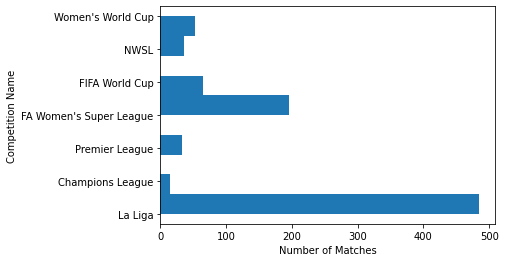

In [9]:
#Look at the distribution of matches in each season
plt.hist(match.competition_name,orientation='horizontal')
plt.xlabel('Number of Matches')
plt.ylabel('Competition Name')

In [10]:
# percentage games for each Competiton
match.competition_name.value_counts(normalize=True)

La Liga                    0.551763
FA Women's Super League    0.221843
FIFA World Cup             0.072810
Women's World Cup          0.059158
NWSL                       0.040956
Premier League             0.037543
Champions League           0.015927
Name: competition_name, dtype: float64

Text(0, 0.5, 'Season Name')

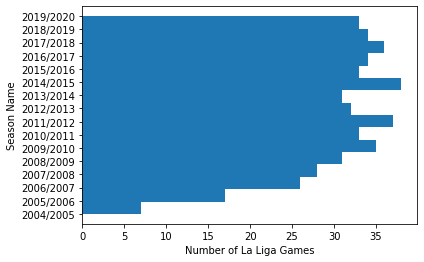

In [11]:
# Plot number of La Liga games per season
df_ll = match[match['competition_id'] == 11]
df_ll = df_ll.sort_values(by=['season_name'])
plt.hist(df_ll.season_name,bins=df_ll.season_name.nunique(),orientation='horizontal')
plt.xlabel('Number of La Liga Games')
plt.ylabel('Season Name')

In [12]:
df = pd.concat([match.away_team_name, match.home_team_name]).to_frame()
df['count_games_played'] = df[0]
df_g = df.count_games_played.value_counts().to_frame()
df_g['percentage_games'] =df_g['count_games_played'] /len(match)
df_g

,count_games_played,percentage_games
Barcelona,488,0.555176
Manchester City WFC,37,0.042093
Arsenal WFC,35,0.039818
Brighton & Hove Albion WFC,35,0.039818
Reading WFC,34,0.038680
...,...,...
Huesca,1,0.001138
Inter Milan,1,0.001138
Everton,1,0.001138
Portsmouth,1,0.001138


### Line Up df

In [13]:
lineup.head()

,team_id,team_name,match_id,player_id,player_name,player_nickname,player_jersey_number,player_country_id,player_country_name
0,217,Barcelona,15946,3109,Malcom Filipe Silva de Oliveira,Malcom,14,31,Brazil
1,217,Barcelona,15946,3501,Philippe Coutinho Correia,Philippe Coutinho,7,31,Brazil
2,217,Barcelona,15946,5203,Sergio Busquets i Burgos,Sergio Busquets,5,214,Spain
3,217,Barcelona,15946,5211,Jordi Alba Ramos,Jordi Alba,18,214,Spain
4,217,Barcelona,15946,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,214,Spain


In [14]:
lineup.shape

(26794, 9)

### Event df

In [15]:
event.head()

,match_id,id,index,period,timestamp_minute,timestamp_second,timestamp_millisecond,minute,second,type_id,...,block_save_block,out,shot_open_goal,injury_stoppage_in_chain,shot_follows_dribble,pass_no_touch,dribble_no_touch,half_start_late_video_start,player_off_permanent,half_end_early_video_end
0,15946,ce508a95-38d3-4248-a50e-dc8d7e23230c,1,1,0,0,0,0,0,35,...,None,NaN,None,None,None,None,None,None,None,None
1,15946,39abd1c2-2575-41be-ae79-3e936eead529,2,1,0,0,0,0,0,35,...,None,NaN,None,None,None,None,None,None,None,None
2,15946,1148e967-380f-421f-97f0-d0c820c72984,3,1,0,0,0,0,0,18,...,None,NaN,None,None,None,None,None,None,None,None
3,15946,7cf6876d-7c50-4d64-b999-e2a039641c81,4,1,0,0,0,0,0,18,...,None,NaN,None,None,None,None,None,None,None,None
4,15946,34208ade-2af4-45c3-970e-655937cad938,5,1,0,0,98,0,0,30,...,None,NaN,None,None,None,None,None,None,None,None


In [16]:
event.shape

(3198449, 95)

In [17]:
event.columns

Index(['match_id', 'id', 'index', 'period', 'timestamp_minute',
       'timestamp_second', 'timestamp_millisecond', 'minute', 'second',
       'type_id', 'type_name', 'sub_type_id', 'sub_type_name', 'outcome_id',
       'outcome_name', 'play_pattern_id', 'play_pattern_name',
       'possession_team_id', 'possession', 'possession_team_name', 'team_id',
       'team_name', 'player_id', 'player_name', 'position_id', 'position_name',
       'duration', 'x', 'y', 'z', 'end_x', 'end_y', 'end_z', 'body_part_id',
       'body_part_name', 'technique_id', 'technique_name', 'counterpress',
       'under_pressure', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_switch', 'pass_assisted_shot_id', 'pass_shot_assist',
       'pass_cross', 'pass_backheel', 'pass_deflected', 'pass_cut_back',
       'pass_goal_assist', 'bad_behaviour_card_id', 'bad_behaviour_card_name',
       'ball_recovery_recovery_failure', 'block_offe

Text(0, 0.5, 'Typre Name')

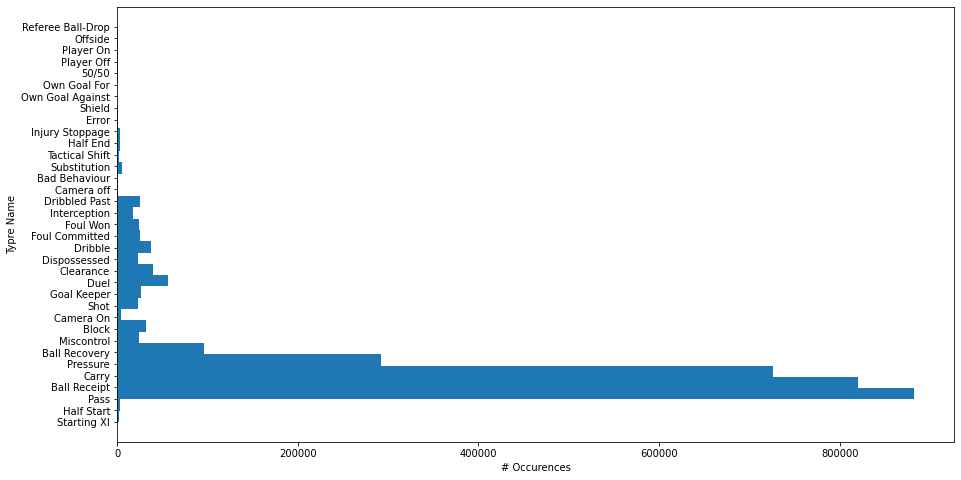

In [18]:
#Look at the distribution of matches in each season
plt.hist(event.type_name,orientation='horizontal', bins=event.type_name.nunique())
plt.gcf().set_size_inches(15, 8)
plt.xlabel('# Occurences')
plt.ylabel('Typre Name')

In [19]:
# Percentenge Distribution of events
event.type_name.value_counts(normalize=True)

Pass                 0.275926
Ball Receipt         0.256283
Carry                0.227009
Pressure             0.091433
Ball Recovery        0.029941
Duel                 0.017570
Clearance            0.012449
Dribble              0.011543
Block                0.009893
Goal Keeper          0.008396
Foul Committed       0.008008
Dribbled Past        0.007721
Foul Won             0.007600
Miscontrol           0.007585
Dispossessed         0.007136
Shot                 0.007089
Interception         0.005320
Substitution         0.001537
Camera On            0.001198
Half Start           0.001133
Half End             0.001133
Injury Stoppage      0.000855
Starting XI          0.000557
Tactical Shift       0.000490
50/50                0.000434
Camera off           0.000322
Shield               0.000281
Referee Ball-Drop    0.000260
Bad Behaviour        0.000197
Player Off           0.000187
Player On            0.000184
Error                0.000164
Offside              0.000106
Own Goal A

### Related df

In [20]:
related.head()

,id,id_related,type_name,index,type_name_related,index_related,match_id
0,1148e967-380f-421f-97f0-d0c820c72984,7cf6876d-7c50-4d64-b999-e2a039641c81,Half Start,3,Half Start,4,15946
1,7cf6876d-7c50-4d64-b999-e2a039641c81,1148e967-380f-421f-97f0-d0c820c72984,Half Start,4,Half Start,3,15946
2,34208ade-2af4-45c3-970e-655937cad938,61da36dc-d862-416c-8ee3-1a0cd24dc086,Pass,5,Ball Receipt,6,15946
3,61da36dc-d862-416c-8ee3-1a0cd24dc086,34208ade-2af4-45c3-970e-655937cad938,Ball Receipt,6,Pass,5,15946
4,8e3dacc2-7a39-4301-9053-e78cfec1aa95,61da36dc-d862-416c-8ee3-1a0cd24dc086,Carry,7,Ball Receipt,6,15946


In [21]:
related.shape

(6219794, 7)

### Freeze df

In [22]:
freeze.head()

,id,event_freeze_id,player_teammate,player_id,player_name,player_position_id,player_position_name,x,y,match_id
0,65f16e50-7c5d-4293-b2fc-d20887a772f9,1,True,6379,Sergi Roberto Carnicer,12,Right Midfield,96.4,53.9,15946
1,b0f73423-3990-45ae-9dda-3512c2d1aff3,1,False,6612,Rubén Duarte Sánchez,6,Left Back,106.0,54.5,15946
2,13b1ddab-d22e-43d9-bfe4-12632fea1a27,1,True,5477,Ousmane Dembélé,16,Left Midfield,100.3,37.2,15946
3,391bfb74-07a6-4afe-9568-02a9b23f5bd4,1,False,5211,Jordi Alba Ramos,6,Left Back,110.0,39.8,15946
4,5e55f5a5-954f-4cc4-ba6e-a9cf6d6e249e,1,False,6626,Mubarak Wakaso,13,Right Center Midfield,105.3,52.3,15946


In [23]:
freeze.shape

(277829, 10)

### Tactic df

In [24]:
tactic.head()

,id,event_tactics_id,player_jersey_number,player_id,player_name,player_position_id,player_position_name,match_id
0,ce508a95-38d3-4248-a50e-dc8d7e23230c,1,1,20055,Marc-André ter Stegen,1,Goalkeeper,15946
1,39abd1c2-2575-41be-ae79-3e936eead529,1,1,6629,Fernando Pacheco Flores,1,Goalkeeper,15946
2,544aa147-a96a-476f-b709-7f72587366a4,1,1,20055,Marc-André ter Stegen,1,Goalkeeper,15946
3,0cf7c15e-cc7a-445f-8d0d-11f85ba6d963,1,1,6629,Fernando Pacheco Flores,1,Goalkeeper,15946
4,8b966a0c-8262-4f62-a638-ac0e943e4f4e,1,1,20055,Marc-André ter Stegen,1,Goalkeeper,15946


In [25]:
tactic.shape

(36817, 8)